# Import Basic Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load the dataset into dataframe

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
data.shape

(768, 9)

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


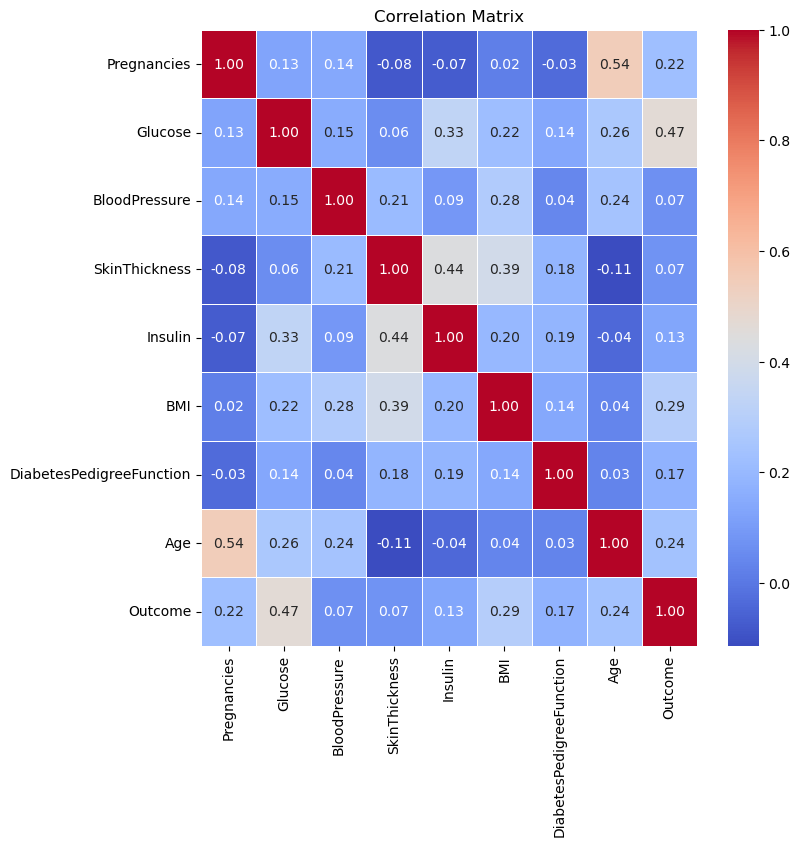

In [10]:
correlation_matrix = data.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

# Data Visualization

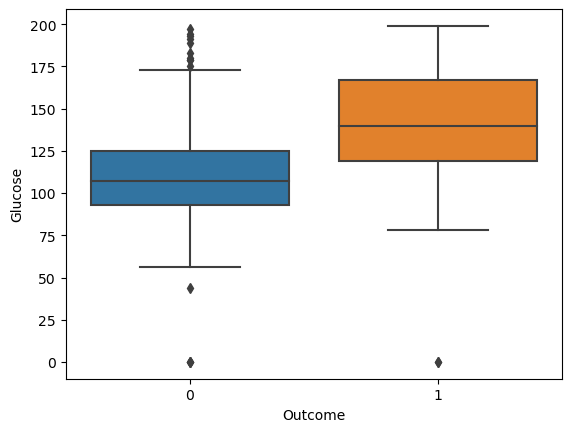

In [12]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.show()


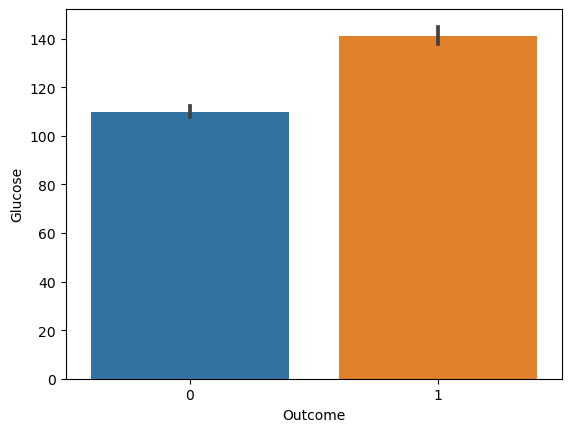

In [13]:
sns.barplot(x='Outcome', y='Glucose', data=data)
plt.show()

<Axes: >

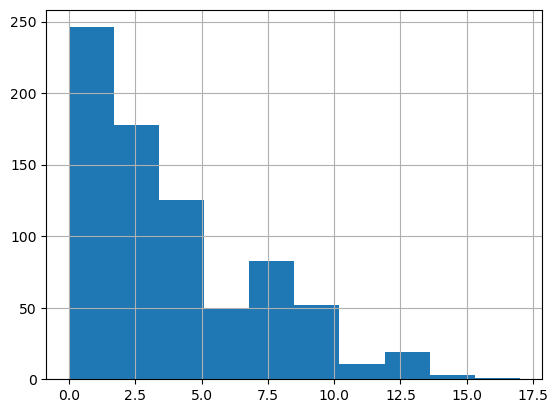

In [14]:
data.Pregnancies.hist()

<Axes: >

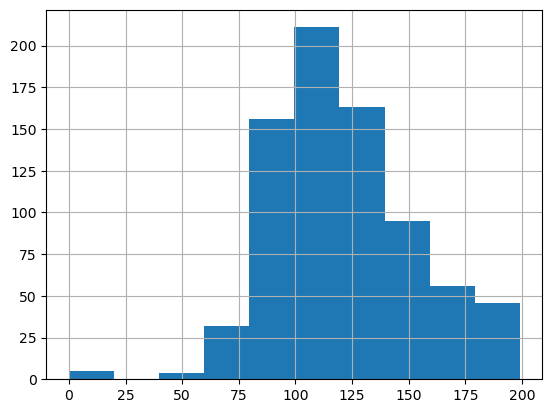

In [15]:
data.Glucose.hist()

In [16]:
X = data.drop("Outcome", axis =1) 
y = data["Outcome"]

# Split and scale the data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled features


# Build and Train the model 

### Random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_scaled, y_train)

pred_rfc = RFC.predict(X_test_scaled)
RFC_Accuracy= accuracy_score(y_test, pred_rfc)
RFC_Accuracy = round(RFC_Accuracy*100, 2)

print("Accuracy score for RandomForestClassifier is: ", RFC_Accuracy)
print(classification_report(y_test, pred_rfc))

Accuracy score for RandomForestClassifier is:  73.96
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       122
           1       0.70      0.50      0.58        70

    accuracy                           0.74       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



### Decission Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)

pred_dt = DT.predict(X_test_scaled)
DT_Accuracy= accuracy_score(y_test, pred_dt)
DT_Accuracy = round(DT_Accuracy *100, 2)
print("Accuracy score for Decission tree classifier is: ", DT_Accuracy )
print(classification_report(y_test, pred_dt))

Accuracy score for Decission tree classifier is:  70.31
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       122
           1       0.59      0.59      0.59        70

    accuracy                           0.70       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.70      0.70      0.70       192



In [21]:
#!pip install xgboost

####  XGBoost classifier

In [22]:
from xgboost import XGBClassifier

In [23]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train_scaled, y_train)

pred_xgb = XGB.predict(X_test_scaled)

XGB_Accuracy = accuracy_score(y_test, pred_xgb)
XGB_Accuracy = round(XGB_Accuracy * 100, 2)
print("Accuracy score for XGBoost classifier is:", XGB_Accuracy)

print(classification_report(y_test, pred_xgb))


Accuracy score for XGBoost classifier is: 68.23
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       122
           1       0.57      0.51      0.54        70

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192



### KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy and print the results
knn_accuracy = accuracy_score(y_test, pred_knn)
knn_accuracy = round(knn_accuracy * 100, 2)
print("Accuracy score for k-Nearest Neighbors classifier is:", knn_accuracy)

# Print classification report
print(classification_report(y_test, pred_knn))


Accuracy score for k-Nearest Neighbors classifier is: 68.75
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       122
           1       0.59      0.47      0.52        70

    accuracy                           0.69       192
   macro avg       0.66      0.64      0.65       192
weighted avg       0.68      0.69      0.68       192



In [25]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)


pred_logreg = logreg.predict(X_test_scaled)


logreg_accuracy = accuracy_score(y_test, pred_logreg)
logreg_accuracy = round(logreg_accuracy * 100, 2)
print("Accuracy score for Logistic Regression is:", logreg_accuracy)

# Print classification report
print(classification_report(y_test, pred_logreg))


Accuracy score for Logistic Regression is: 76.56
              precision    recall  f1-score   support

           0       0.75      0.93      0.84       122
           1       0.80      0.47      0.59        70

    accuracy                           0.77       192
   macro avg       0.78      0.70      0.71       192
weighted avg       0.77      0.77      0.75       192



# Summary of Algorithm's Accuracy 

In [26]:
data = {'Algorithm': ['Random Forest Classifier','Decision Tree Classifier','XGBoost Classifier', 'KNeighborsClassifier', 'Logistic Regression'],
        'Accuracy': [RFC_Accuracy, DT_Accuracy, XGB_Accuracy, knn_accuracy, logreg_accuracy]}

summary = pd.DataFrame(data)

summary.head()

,Algorithm,Accuracy
0,Random Forest Classifier,73.96
1,Decision Tree Classifier,70.31
2,XGBoost Classifier,68.23
3,KNeighborsClassifier,68.75
4,Logistic Regression,76.56


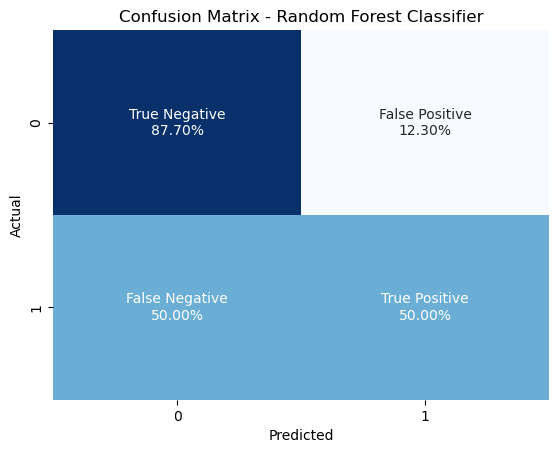

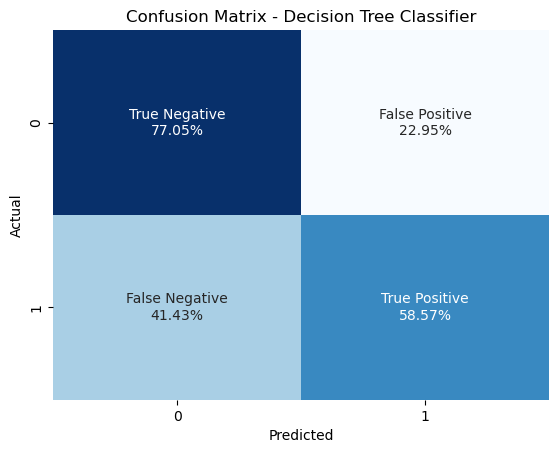

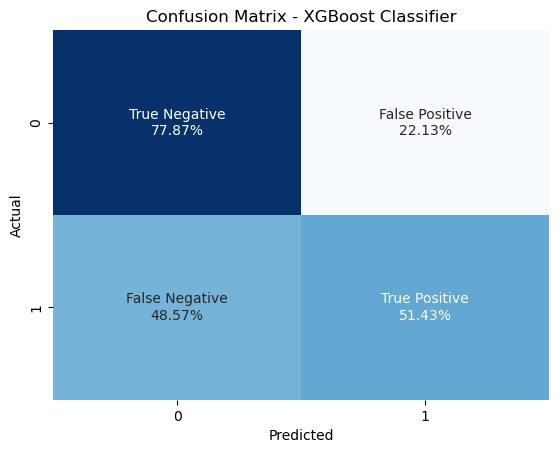

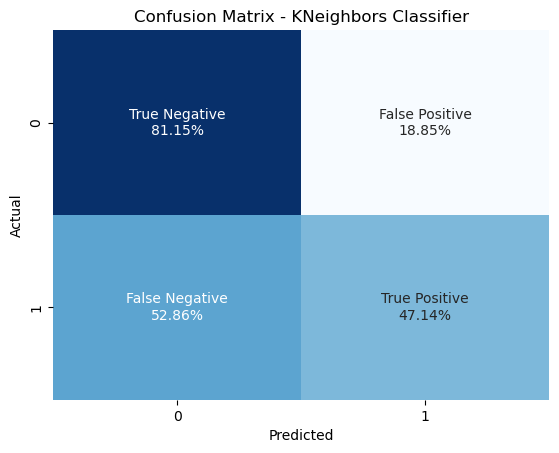

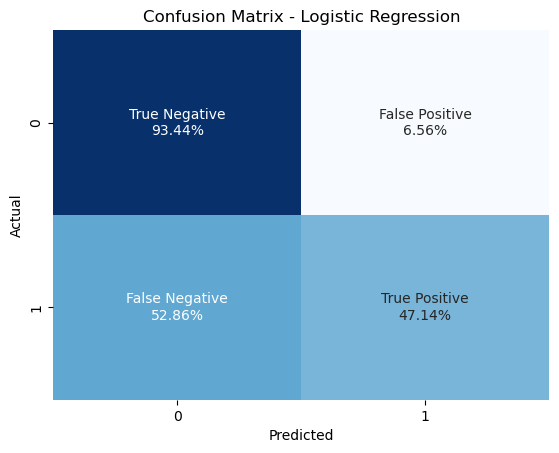

In [27]:
import numpy as np

def plot_confusion_matrix_percentage(cm, title, class_names):
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    labels = [f"{desc}\n{percent:.2f}%" for desc, percent in zip(class_names, cm_percent.flatten())]
    sns.heatmap(cm_percent, annot=np.array(labels).reshape(2, 2), fmt='', cmap='Blues', cbar=False)

    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_rfc = confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix_percentage(cm_rfc, 'Confusion Matrix - Random Forest Classifier', class_names)
cm_dt = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix_percentage(cm_dt, 'Confusion Matrix - Decision Tree Classifier', class_names)


cm_xgb = confusion_matrix(y_test, pred_xgb)
plot_confusion_matrix_percentage(cm_xgb, 'Confusion Matrix - XGBoost Classifier', class_names)
cm_knn = confusion_matrix(y_test, pred_knn)
plot_confusion_matrix_percentage(cm_knn, 'Confusion Matrix - KNeighbors Classifier', class_names)
cm_logreg = confusion_matrix(y_test, pred_logreg)
plot_confusion_matrix_percentage(cm_logreg, 'Confusion Matrix - Logistic Regression', class_names)


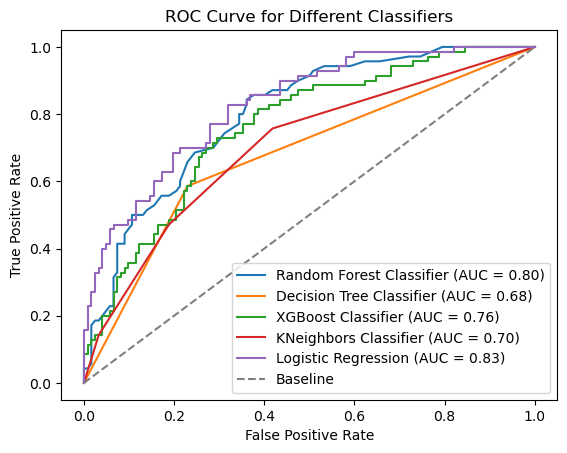

In [28]:
from sklearn.metrics import roc_curve, auc

pred_proba_rfc = RFC.predict_proba(X_test_scaled)
pred_proba_dt = DT.predict_proba(X_test_scaled)
pred_proba_xgb = XGB.predict_proba(X_test_scaled)
pred_proba_knn = knn.predict_proba(X_test_scaled)
pred_proba_logreg = logreg.predict_proba(X_test_scaled)


def plot_roc_curve(fpr, tpr, label, auc_score):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, pred_proba_rfc[:, 1])
auc_rfc = auc(fpr_rfc, tpr_rfc)
plot_roc_curve(fpr_rfc, tpr_rfc, 'Random Forest Classifier', auc_rfc)
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_proba_dt[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, 'Decision Tree Classifier', auc_dt)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_proba_xgb[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)
plot_roc_curve(fpr_xgb, tpr_xgb, 'XGBoost Classifier', auc_xgb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_proba_knn[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, 'KNeighbors Classifier', auc_knn)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, pred_proba_logreg[:, 1])
auc_logreg = auc(fpr_logreg, tpr_logreg)
plot_roc_curve(fpr_logreg, tpr_logreg, 'Logistic Regression', auc_logreg)


plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.show()


In [29]:
import pickle

# Save Logistic Regression Classifier machine learning model
with open('model.pkl', 'wb') as file:
    pickle.dump(pred_logreg, file)
